## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [24]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [25]:
#data=fasion_mnist.data.values (Original Line)
data=fasion_mnist.data #Modiefied bc I got "AttributeError: 'numpy.ndarray' object has no attribute 'values'"
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [26]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [27]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [28]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [29]:
[target.min(), target.max()]

[0, 9]

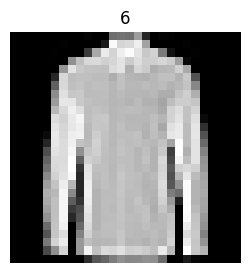

<Figure size 640x480 with 0 Axes>

In [30]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [31]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [32]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2, whiten=False)
proj_ipca = ipca.fit_transform(data)

C:\Users\matth\AppData\Local\Temp\ipykernel_12444\301832235.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=proj_ipca[:, 0], cmap=plt.cm.get_cmap('rainbow', 9), marker='.')
C:\Users\matth\AppData\Local\Temp\ipykernel_12444\301832235.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(proj_ipca[:, 0], proj_ipca[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10), marker='.')


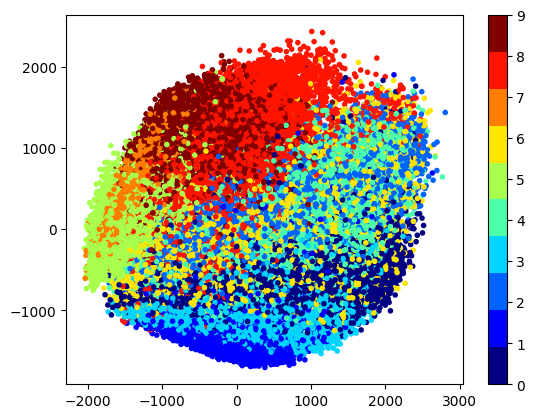

In [33]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()
fig, ax = plt.subplots()
colorize = dict(c=proj_ipca[:, 0], cmap=plt.cm.get_cmap('rainbow', 9), marker='.')
plt.scatter(proj_ipca[:, 0], proj_ipca[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10), marker='.')
plt.colorbar(ticks=range(10))

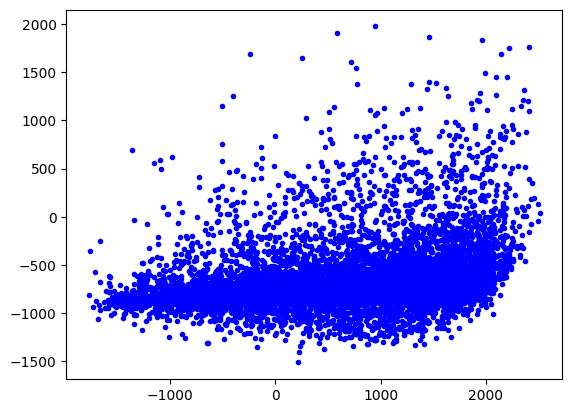

In [34]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
plt.scatter(proj_ipca[target == 0, 0], proj_ipca[target == 0, 1], c='blue', marker='.')

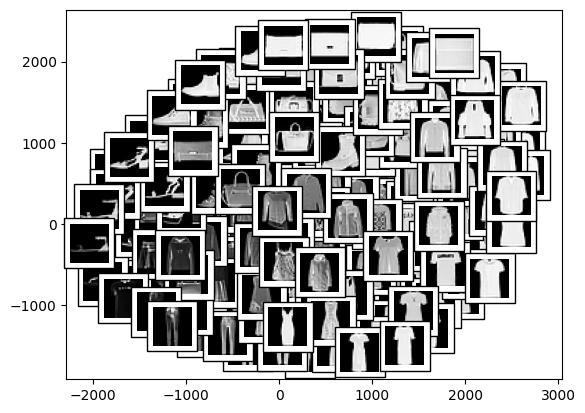

In [35]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
plot_components(proj_ipca, ipca, images, ax=None,
                    thumb_frac=0.05, cmap='gray')

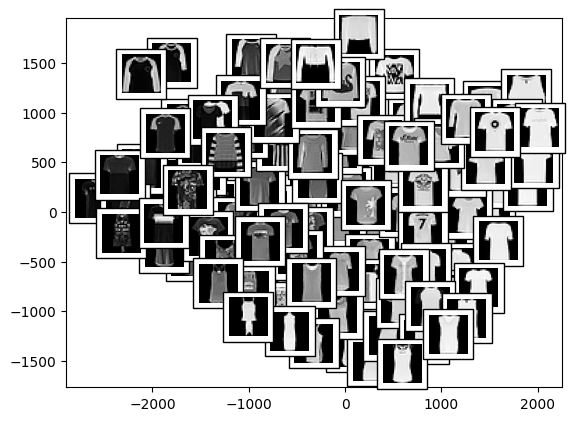

In [45]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]

#output isn't exactly matching up to what was shown before running the code. It's similar but not the same 
plot_components(data[target==0], ipca, images[target==0], ax=None,
                    thumb_frac=0.05, cmap='gray')

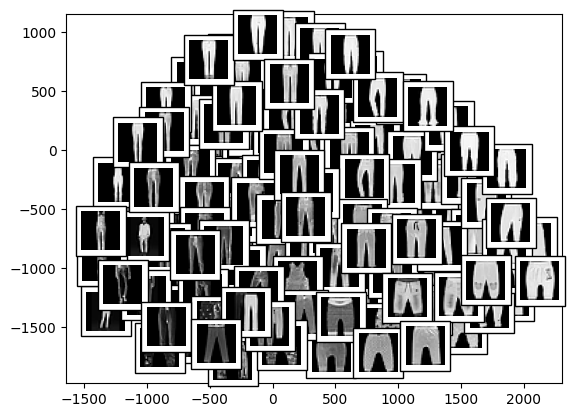

In [44]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]

#output isn't exactly matching up to what was shown before running the code. 
#It's very similar but certain images are not where they should be
plot_components(data[target==1], ipca, images[target==1], ax=None,
                    thumb_frac=0.05, cmap='gray')

From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [48]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.decomposition import IncrementalPCA
n_components = 100
ipca2 = IncrementalPCA(n_components, whiten=False).fit(data)
transformed = ipca2.transform(data)
proj_ipca2 = ipca2.inverse_transform(transformed)


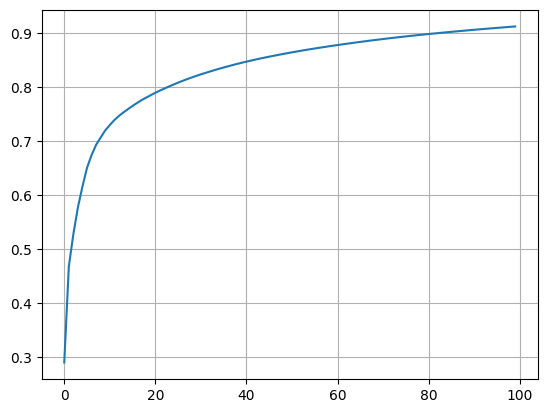

In [49]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
plt.plot(np.cumsum(ipca2.explained_variance_ratio_))
plt.grid()

In [50]:
# find the smallest value of n_component such that 
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same
# you do not need to re-fit the model using this new value of n_component
n_component_number = 0
#for i in range(range(n_components))
while(np.cumsum(ipca2.explained_variance_ratio_)[n_component_number] < 0.8):
            n_component_number += 1
print('Smallest value of n_component = ', n_component_number)
    

Smallest value of n_component =  23


In [51]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)
mu = ipca2.mean_
v = ipca2.explained_variance_
w = ipca2.components_

print('mean = ', mu)
print('eigenvalues = ', v)
print('eigenvectors = ', w)

mean =  [7.71428571e-04 6.41428571e-03 3.44857143e-02 9.88857143e-02
 2.47842857e-01 4.08714286e-01 8.02900000e-01 2.20438571e+00
 5.63490000e+00 1.44100000e+01 3.29068571e+01 4.58169714e+01
 5.20562286e+01 5.07853143e+01 5.04461714e+01 5.37923429e+01
 5.14235857e+01 4.05507429e+01 2.60359571e+01 1.03548286e+01
 4.07085714e+00 1.94085714e+00 1.16301429e+00 8.44214286e-01
 4.71400000e-01 2.56100000e-01 9.26428571e-02 1.81285714e-02
 7.01428571e-03 2.48000000e-02 1.06685714e-01 3.54671429e-01
 7.66971429e-01 2.07485714e+00 7.26434286e+00 1.73702000e+01
 3.19401286e+01 5.29159571e+01 7.96850857e+01 1.00216229e+02
 1.13055186e+02 1.11231129e+02 1.09131557e+02 1.14742400e+02
 1.10488757e+02 9.10748429e+01 7.16686000e+01 4.50350000e+01
 2.59938143e+01 1.35525143e+01 6.19580000e+00 3.48902857e+00
 2.21898571e+00 1.18970000e+00 4.54485714e-01 7.99285714e-02
 2.53142857e-02 8.64714286e-02 2.69200000e-01 7.21985714e-01
 2.11591429e+00 9.40044286e+00 2.29177429e+01 3.48488000e+01
 4.96397000e+01 

In [52]:
v.shape

(100,)

In [53]:
w.shape

(100, 784)

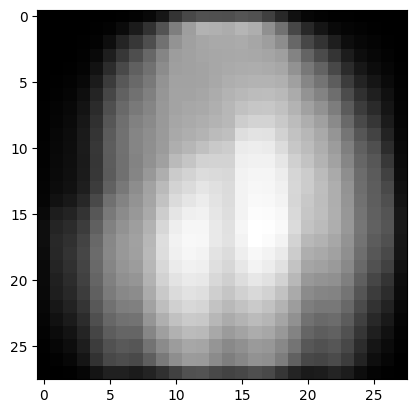

In [54]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

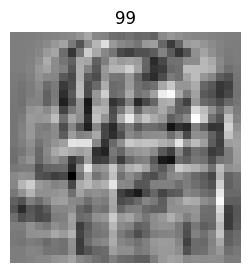

<Figure size 640x480 with 0 Axes>

In [140]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')    
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2) 

#Output stops on image 99 whereas original output stops on image 19

fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    ax.imshow(w[n].reshape(28,28).reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 

In [141]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

1.0000000000000013

In [142]:
# generate a random number
3*np.random.randn()

-2.1051643923276124

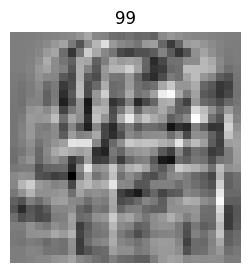

<Figure size 640x480 with 0 Axes>

In [143]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()

fig, ax = plt.subplots(figsize=(3, 3))
for n in range(100):
    x_new = mu
    for k in range(len(w)):
        x_new += 3*np.random.randn()*sqrt(v[k])*w[k]
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 

PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [144]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

C:\Users\matth\AppData\Local\Temp\ipykernel_23860\3911204416.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=target_s, cmap=plt.cm.get_cmap('rainbow', 9), marker='.')


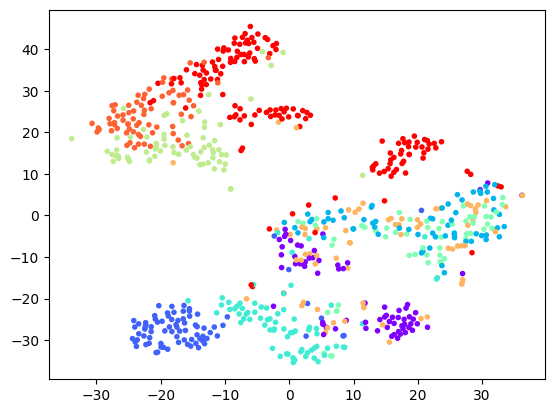

In [145]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
from sklearn.manifold import TSNE
fig, ax = plt.subplots()
colorize = dict(c=target_s, cmap=plt.cm.get_cmap('rainbow', 9), marker='.')
model = TSNE(n_components=2)
out = model.fit_transform(data_s)
ax.scatter(out[:, 0], out[:, 1], **colorize)